In [1]:
# Import libraries
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
    classification_report,
)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
df = pd.read_csv("hf://datasets/nahiar/spam_detection/combined_dataset.csv")

In [3]:
# Ganti code qgrid dengan itables
from itables import show

# Interactive table yang jauh lebih baik dari qgrid
show(
    df,
    lengthMenu=[10, 25, 50, 100, -1],
    scrollX=True,
    scrollY="400px",
    classes="display compact stripe hover",
)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6415 entries, 0 to 6414
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kategori  6415 non-null   object
 1   Pesan     6415 non-null   object
 2   source    6415 non-null   object
dtypes: object(3)
memory usage: 150.5+ KB


In [5]:
print("Jumlah missing values disetiap kolom:\n", df.isnull().sum())

Jumlah missing values disetiap kolom:
 Kategori    0
Pesan       0
source      0
dtype: int64


In [6]:
df["label"] = df["Kategori"].apply(
    lambda x: 1 if x == "spam" else 0
)  # Mengubah label menjadi 0 (non-spam) dan 1 (spam)

In [7]:
from transformers import AutoConfig

config = AutoConfig.from_pretrained("cahya/bert-base-indonesian-1.5G")
print(config)

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.53.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 32000
}



In [8]:
# Catatan: Tokenizer digunakan untuk mengubah teks menjadi representasi numerik
# Initialize tokenizer and model
from transformers import AutoModelForSequenceClassification, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("cahya/bert-base-indonesian-1.5G")
model = AutoModelForSequenceClassification.from_pretrained(
    "cahya/bert-base-indonesian-1.5G"
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-base-indonesian-1.5G and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Catatan: Tokenizer digunakan untuk mengubah teks menjadi representasi numerik
# Initialize tokenizer and model
from transformers import AutoModelForSequenceClassification, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("cahya/bert-base-indonesian-1.5G")
model = AutoModelForSequenceClassification.from_pretrained(
    "cahya/bert-base-indonesian-1.5G"
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-base-indonesian-1.5G and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Catatan: Tokenizer digunakan untuk mengubah teks menjadi representasi numerik
# Initialize tokenizer and model
from transformers import AutoModelForSequenceClassification, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("cahya/bert-base-indonesian-1.5G")
model = AutoModelForSequenceClassification.from_pretrained(
    "cahya/bert-base-indonesian-1.5G"
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-base-indonesian-1.5G and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Catatan: Tokenizer digunakan untuk mengubah teks menjadi representasi numerik
# Initialize tokenizer and model
from transformers import AutoModelForSequenceClassification, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("cahya/bert-base-indonesian-1.5G")
model = AutoModelForSequenceClassification.from_pretrained(
    "cahya/bert-base-indonesian-1.5G"
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-base-indonesian-1.5G and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Catatan: Tokenizer digunakan untuk mengubah teks menjadi representasi numerik
# Initialize tokenizer and model
from transformers import AutoModelForSequenceClassification, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("cahya/bert-base-indonesian-1.5G")
model = AutoModelForSequenceClassification.from_pretrained(
    "cahya/bert-base-indonesian-1.5G"
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-base-indonesian-1.5G and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
# Preprocessing - Tokenize the email messages
def tokenize_function(text):
    # Fungsi untuk men-tokenisasi teks email dan mengubahnya menjadi input untuk model
    return tokenizer(
        text, padding="max_length", truncation=True, max_length=128, return_tensors="pt"
    )

In [10]:
# Tokenizing email messages
texts = list(df["Pesan"])  # Mengambil semua teks dari kolom 'Pesan'
labels = list(df["label"])  # Mengambil semua label (0 atau 1)
tokenized_texts = [tokenize_function(text) for text in texts]  # Tokenisasi semua teks

In [11]:
# Prepare input tensors for PyTorch
# Menggabungkan token input dan attention mask menjadi tensor yang siap digunakan untuk training
input_ids = torch.cat([x["input_ids"] for x in tokenized_texts], dim=0)
attention_masks = torch.cat([x["attention_mask"] for x in tokenized_texts], dim=0)
labels = torch.tensor(labels)

In [12]:
# Membagi dataset menjadi data training dan data validasi (80% training, 20% testing)
train_inputs, val_inputs, train_labels, val_labels = train_test_split(
    input_ids, labels, test_size=0.2
)
train_masks, val_masks, _, _ = train_test_split(attention_masks, labels, test_size=0.2)

In [13]:
# Membuat DataLoader untuk mini-batch training dan validation
batch_size = 32

def ensure_tensor(x):
    if isinstance(x, torch.Tensor):
        return x.clone().detach()
    return torch.tensor(x)


train_inputs = ensure_tensor(train_inputs)
train_masks = ensure_tensor(train_masks)
train_labels = ensure_tensor(train_labels)

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = torch.utils.data.RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_inputs = ensure_tensor(val_inputs)
val_masks = ensure_tensor(val_masks)
val_labels = ensure_tensor(val_labels)

validation_data = TensorDataset(val_inputs, val_masks, val_labels)
validation_sampler = torch.utils.data.SequentialSampler(validation_data)
validation_dataloader = DataLoader(
    validation_data, sampler=validation_sampler, batch_size=batch_size
)

In [14]:
# Training setup
from torch.optim import AdamW

# Optimizer digunakan untuk mengupdate parameter model selama training
optimizer = AdamW(model.parameters(), lr=2e-5)

In [15]:
# Training Loop
epochs = 3
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    model.train()

    total_loss = 0
    for batch in train_dataloader:
        # Mengambil batch input ids, attention mask, dan label
        batch_input_ids, batch_attention_mask, batch_labels = batch

        optimizer.zero_grad()  # Mengatur ulang gradien sebelum backward pass

        # Memprediksi output dari model dan menghitung loss
        outputs = model(
            input_ids=batch_input_ids,
            attention_mask=batch_attention_mask,
            labels=batch_labels,
        )
        loss = outputs.loss
        total_loss += loss.item()

        # Backward pass untuk menghitung gradien dan update parameter
        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Average training loss: {avg_train_loss:.4f}")

    # Evaluation
    model.eval()
    correct = 0
    total = 0

    predictions_list = []
    true_labels_list = []

    with torch.no_grad():
        for batch in validation_dataloader:
            batch_input_ids, batch_attention_mask, batch_labels = batch
            outputs = model(
                input_ids=batch_input_ids, attention_mask=batch_attention_mask
            )
            predictions = torch.argmax(outputs.logits, dim=-1)

            # Mengumpulkan prediksi dan label sebenarnya untuk evaluasi
            predictions_list.extend(predictions.tolist())
            true_labels_list.extend(batch_labels.tolist())

            correct += (predictions == batch_labels).sum().item()
            total += batch_labels.size(0)

    accuracy = correct / total
    print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Epoch 1/3
Average training loss: 0.1572
Validation Accuracy: 98.67%
Epoch 2/3
Average training loss: 0.0344
Validation Accuracy: 98.67%
Epoch 3/3
Average training loss: 0.0108
Validation Accuracy: 99.06%


Confusion Matrix:
[[607  11]
 [  1 664]]


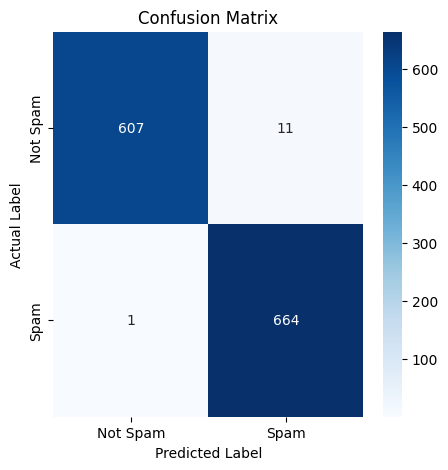

In [16]:
# Confusion Matrix & Evaluation Metrics
cm = confusion_matrix(true_labels_list, predictions_list)
print(f"Confusion Matrix:\n{cm}")

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Spam", "Spam"],
    yticklabels=["Not Spam", "Spam"],
)
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

In [17]:
# Generate and print the classification report
classification_rep = classification_report(
    true_labels_list, predictions_list, target_names=["not spam", "spam"]
)
print(f"Classification Report:\n{classification_rep}")

Classification Report:
              precision    recall  f1-score   support

    not spam       1.00      0.98      0.99       618
        spam       0.98      1.00      0.99       665

    accuracy                           0.99      1283
   macro avg       0.99      0.99      0.99      1283
weighted avg       0.99      0.99      0.99      1283



In [ ]:
# Save model
model.save_pretrained("./models/v2")
tokenizer.save_pretrained("./models/v2")

('./models/fine_tuned_spam_model/tokenizer_config.json',
 './models/fine_tuned_spam_model/special_tokens_map.json',
 './models/fine_tuned_spam_model/vocab.txt',
 './models/fine_tuned_spam_model/added_tokens.json',
 './models/fine_tuned_spam_model/tokenizer.json')

In [2]:
# Define a function for spam/ham prediction
def predict_spam_ham(text, model, tokenizer):
    # Tokenisasi input teks dan prediksi apakah spam atau bukan
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    probs = outputs.logits.softmax(1)
    return "spam" if torch.argmax(probs) == 1 else "not spam"

In [3]:
# Percobaan prediksi apakah pesan adalah spam atau bukan
input_text = "PT KAI menunda jadwal penertiban satu rumah di Tegal Lempuyangan, Bausasran, Danurejan, Kota Jogja. Semula penertiban tersebut dijadwalkan hari kamis kemarin, namun pihak PT KAI tak datang. Manager Humas KAI Daop 6 Jogja, Feni Novida Saragih enggan bicara banyak terkait penundaan tersebut. Namun, dia menegaskan pihaknya bakal melakukan penertiban. Terkait waktunya akan disampaikan lebih lanjut. Feni melanjutkan, proses penertiban untuk penataan stasiun sesuai dengan prosedur. Mengingat PT KAI telah melakukan upaya sosialisasi hingga mediasi dengan warga. Pie komentarmu, Dab? (detikjogja_)"
print(predict_spam_ham(input_text, model, tokenizer))

NameError: name 'model' is not defined

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_path = "/Users/rhd/Documents/Raihan/Dev/Model-ML/spam-detection-twitter/models/v1"

tokenizer = AutoTokenizer.from_pretrained(model_path, local_files_only=True)
model = AutoModelForSequenceClassification.from_pretrained(
    model_path, local_files_only=True
)

# Contoh input
text = "Personil Polsek Selesai melakukan Patroli guna Mengantisipasi dan mencegah terjadinya tindak pidana Seperti Kejahatan Jalanan, 3C ( Curas, Curat dan Curanmor) dan Geng Motor yang dapat Menimbulkan Gangguan Kamtibmas di Wilayah Hukum Polsek Selesai https://t.co/ZbZkzqpOq8"

# Tokenisasi
inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

# Prediksi
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_id = logits.argmax().item()

# Mapping label (misal 0: ham, 1: spam)
label_map = {0: "ham", 1: "spam"}
print("Prediksi:", label_map[predicted_class_id])

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Prediksi: spam
